# Fake News Detection - Model training and evaluation

This notebook demonstrates a pipeline for fake news detection using classical machine learning and deep learning models. The workflow includes data loading with extracted featuref from previuous step, model training, hyperparameter tuning, and evaluation.

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import  RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

import joblib

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

import shap

## Evaluation Metrics Functions

Define helper functions to calculate and print accuracy and F1-score for both training and testing sets, and to visualize the confusion matrix.

In [ ]:
def metrics(y_true, y_pred, model_name, dataset_type):
    """
    Calculate and print accuracy and F1 score for the given predictions.
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model used for predictions.
        dataset_type (str): Type of dataset ('train' or 'test').
    Returns:    
        dict: A dictionary containing accuracy and F1 score.
    """ 
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    metrics_dict = {
        'model': model_name,
        'dataset': dataset_type,
        'accuracy': acc,
        'f1_score': f1
    }
    print(f"{dataset_type.capitalize()} Accuracy:", round(acc, 4))
    print(f"{dataset_type.capitalize()} F1 Score:", round(f1, 4))
    return metrics_dict

def eval_model(model, X_train, X_test, y_train, y_test, type):
    """
    Evaluate a machine learning model on training and testing data.
    """
        
    # model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_name = model.__class__.__name__

    print("Model:", model_name)
    print("Training report:")
    train_metrics = metrics(y_train, y_pred_train, model_name, 'train')
    print("Testing report:")
    test_metrics = metrics(y_test, y_pred_test, model_name, 'test')

    # Combine both metrics into one dictionary
    combined_metrics = {
        'vectot_type': type,
        'model': model_name,
        'train_accuracy': train_metrics['accuracy'],
        'train_f1_score': train_metrics['f1_score'],
        'test_accuracy': test_metrics['accuracy'],
        'test_f1_score': test_metrics['f1_score']
    }

    plt.figure(figsize=(3, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name} on {type} data')
    plt.show()
    
    return combined_metrics

## Load Preprocessed Data

Load the preprocessed feature matrices and target arrays for Bag of Words, TF-IDF, FastText, and BERT embeddings. These are used for training and evaluating models.

In [3]:
# Load the preprocessed data
y_train = np.load(os.path.join('samples', 'y_train.npy'))
y_test = np.load(os.path.join('samples', 'y_test.npy'))

# Bag of Words
X_train_bow = np.load(os.path.join('samples', 'X_train_bow.npy'))
X_test_bow = np.load(os.path.join('samples', 'X_test_bow.npy'))

# TF-IDF
X_train_tfidf = np.load(os.path.join('samples', 'X_train_tfidf.npy'))
X_test_tfidf = np.load(os.path.join('samples', 'X_test_tfidf.npy')) 

# Word2Vec using FastText
X_train_fasttext = np.load('samples/X_train_fasttext.npy')
X_test_fasttext = np.load('samples/X_test_fasttext.npy')

# BERT embeddings
X_train_bert = np.load('samples/X_train_bert.npy')
X_test_bert = np.load('samples/X_test_bert.npy')

## Classical Machine Learning Models

Now lets use multiple feature extraction methods from previous step allows us to compare how different representations affect model performance. BERT and FastText embeddings are expected to capture more semantic information than BoW or TF-IDF.

Train and evaluate Logistic Regression, Random Forest, and XGBoost classifiers on each vectorization method (BoW, TF-IDF, FastText, BERT). Save each trained model for future use.

Evaluating Logistic Regression with BoW:
Model: LogisticRegression
Training report:
Train Accuracy: 0.9723
Train F1 Score: 0.9723
Testing report:
Test Accuracy: 0.944
Test F1 Score: 0.9441


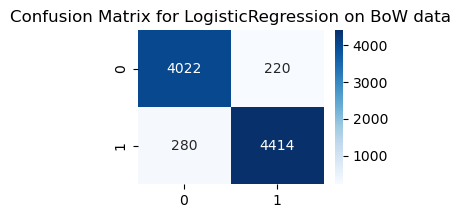

Evaluating Random Forest with BoW:
Model: RandomForestClassifier
Training report:
Train Accuracy: 0.8679
Train F1 Score: 0.8677
Testing report:
Test Accuracy: 0.8502
Test F1 Score: 0.8498


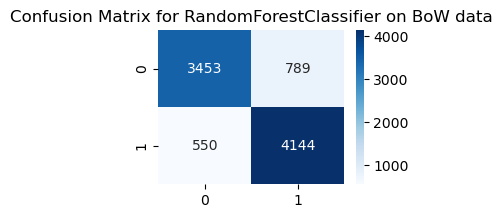

Evaluating XGBoost with BoW:


c:\Users\Olha Shaposhnyk\anaconda3\envs\laba\lib\site-packages\xgboost\core.py:158: UserWarning: [15:16:52] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Training report:
Train Accuracy: 0.9172
Train F1 Score: 0.9172
Testing report:
Test Accuracy: 0.9009
Test F1 Score: 0.9008


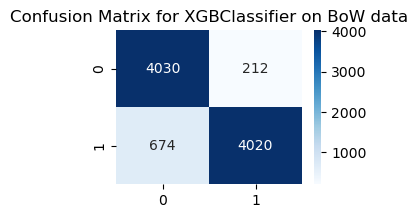

Evaluating Logistic Regression with TF-IDF:
Model: LogisticRegression
Training report:
Train Accuracy: 0.9459
Train F1 Score: 0.9459
Testing report:
Test Accuracy: 0.9322
Test F1 Score: 0.9322


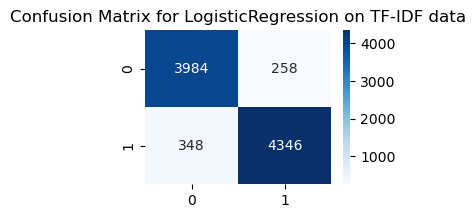

Evaluating Random Forest with TF-IDF:
Model: RandomForestClassifier
Training report:
Train Accuracy: 0.8719
Train F1 Score: 0.8719
Testing report:
Test Accuracy: 0.8538
Test F1 Score: 0.8539


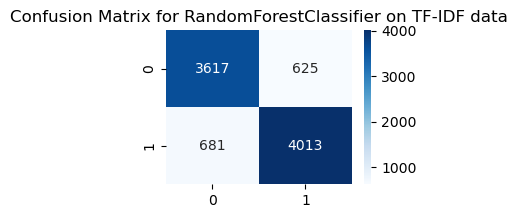

Evaluating XGBoost with TF-IDF:


c:\Users\Olha Shaposhnyk\anaconda3\envs\laba\lib\site-packages\xgboost\core.py:158: UserWarning: [15:17:12] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Training report:
Train Accuracy: 0.9235
Train F1 Score: 0.9236
Testing report:
Test Accuracy: 0.8976
Test F1 Score: 0.8976


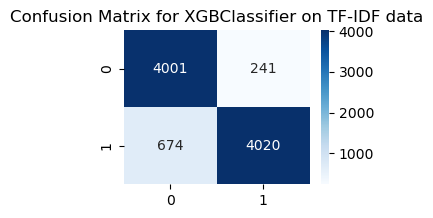

Evaluating Logistic Regression with FastText:
Model: LogisticRegression
Training report:
Train Accuracy: 0.8532
Train F1 Score: 0.8532
Testing report:
Test Accuracy: 0.8452
Test F1 Score: 0.8452


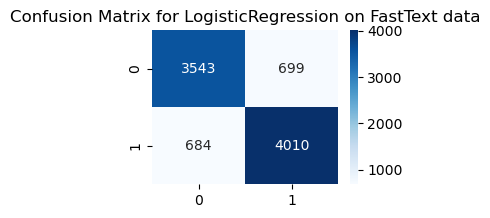

Evaluating Random Forest with FastText:
Model: RandomForestClassifier
Training report:
Train Accuracy: 0.9282
Train F1 Score: 0.9281
Testing report:
Test Accuracy: 0.8449
Test F1 Score: 0.8446


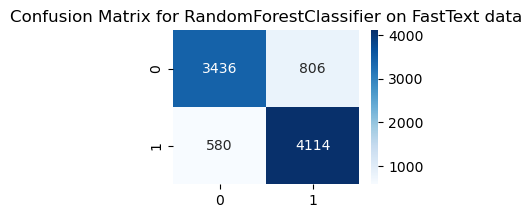

Evaluating XGBoost with FastText:


c:\Users\Olha Shaposhnyk\anaconda3\envs\laba\lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:01] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Training report:
Train Accuracy: 0.9923
Train F1 Score: 0.9923
Testing report:
Test Accuracy: 0.8874
Test F1 Score: 0.8874


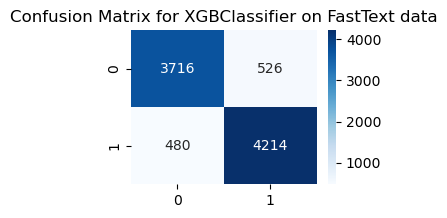

Evaluating Logistic Regression with BERT:
Model: LogisticRegression
Training report:
Train Accuracy: 0.976
Train F1 Score: 0.976
Testing report:
Test Accuracy: 0.9683
Test F1 Score: 0.9683


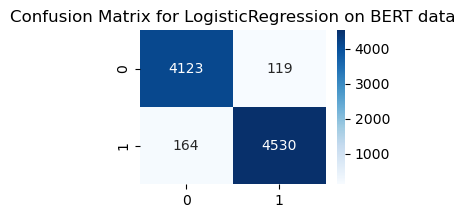

Evaluating Random Forest with BERT:
Model: RandomForestClassifier
Training report:
Train Accuracy: 0.979
Train F1 Score: 0.979
Testing report:
Test Accuracy: 0.9329
Test F1 Score: 0.9329


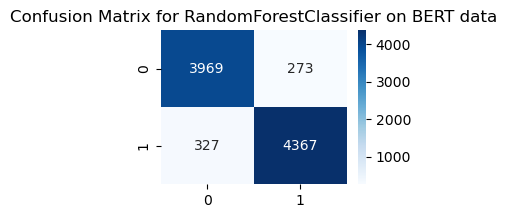

Evaluating XGBoost with BERT:


c:\Users\Olha Shaposhnyk\anaconda3\envs\laba\lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:23] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Training report:
Train Accuracy: 1.0
Train F1 Score: 1.0
Testing report:
Test Accuracy: 0.9662
Test F1 Score: 0.9662


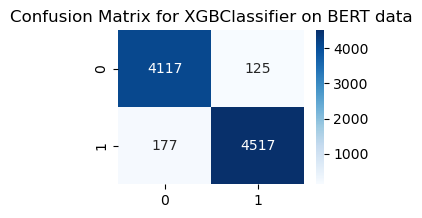

In [6]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

vectorizer_types = [
    ('BoW', X_train_bow, X_test_bow),
    ('TF-IDF', X_train_tfidf, X_test_tfidf),
    ('FastText', X_train_fasttext, X_test_fasttext),
    ('BERT', X_train_bert, X_test_bert)
]

metrics_results = []
models_save = {}

for vect_type, X_train, X_test in vectorizer_types:
    for model_name, model in models.items():
        print(f"Evaluating {model_name} with {vect_type}:")
        trained_model = model.fit(X_train, y_train)
        metrics_dict = eval_model(trained_model, X_train, X_test, y_train, y_test, vect_type)
        metrics_results.append(metrics_dict)
        models_save[f"{vect_type}"] = trained_model

        # Save the models
        joblib.dump(trained_model, f'models/{vect_type}_{model_name}.joblib')


## Hyperparameter Tuning for XGBoost

XGBClassifier provides very good performance metrics. Let's try to mitigate overacting. 
Use RandomizedSearchCV to find the best hyperparameters for XGBoost on BERT embeddings. 

In [7]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    xgb_param_grid, n_iter=10, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42, verbose=2
)

search.fit(X_train_bert, y_train)
print("Best parameters found: ", search.best_params_)
best_xgb_model = search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Olha Shaposhnyk\anaconda3\envs\laba\lib\site-packages\xgboost\core.py:158: UserWarning: [15:25:45] WARNING: D:\bld\xgboost-split_1738880170463\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}


Model: XGBClassifier
Training report:
Train Accuracy: 0.9997
Train F1 Score: 0.9997
Testing report:
Test Accuracy: 0.9645
Test F1 Score: 0.9645


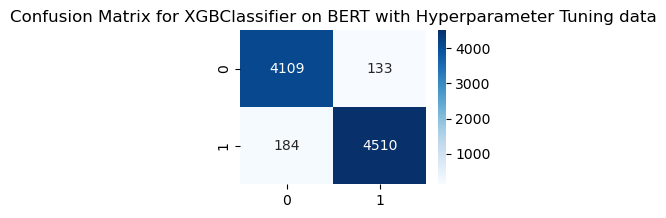

['models/BERT_Tuning.joblib']

In [8]:
metrics_dict = eval_model(best_xgb_model, X_train_bert, X_test_bert, y_train, y_test, 'BERT with Hyperparameter Tuning')
metrics_results.append(metrics_dict)

models_save[f"BERT_Tuning"] = best_xgb_model
joblib.dump(best_xgb_model, f'models/BERT_Tuning.joblib')

In [12]:
metrics_results_df = pd.DataFrame(metrics_results)
metrics_results_df

,vectot_type,model,train_accuracy,train_f1_score,test_accuracy,test_f1_score
0,BoW,LogisticRegression,0.972331,0.972338,0.944047,0.944063
1,BoW,RandomForestClassifier,0.867950,0.867685,0.850157,0.849845
2,BoW,XGBClassifier,0.917217,0.917240,0.900850,0.900845
3,TF-IDF,LogisticRegression,0.945865,0.945883,0.932184,0.932212
4,TF-IDF,RandomForestClassifier,0.871895,0.871914,0.853850,0.853890
5,TF-IDF,XGBClassifier,0.923540,0.923567,0.897605,0.897616
6,FastText,LogisticRegression,0.853178,0.853212,0.845233,0.845219
7,FastText,RandomForestClassifier,0.928240,0.928144,0.844897,0.844598
8,FastText,XGBClassifier,0.992278,0.992279,0.887422,0.887389
9,BERT,LogisticRegression,0.975968,0.975972,0.968330,0.968338


# Deep Learning Approach

## Neural Network with TensorFlow/Keras

Build, train, and evaluate a deep neural network using TensorFlow/Keras on Bag of Words features. Use early stopping to prevent overfitting and visualize training history.


- **Training History:** The accuracy and loss plots help us monitor overfitting. 
- **Early Stopping:** Prevents overfitting by interrupt training when validation performance stops improving.
- **Regularization**: Use Dropout, L2 to prevent overfitting


Current structure were created by experiments. The more simplest architectures overfitted and didnt provide good performance


In [ ]:
input_dim = X_train_bow.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,736,641 (10.44 MB)

 Trainable params: 2,734,849 (10.43 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [16]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(X_train_bow, y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_split=0.1, 
                    verbose=2,
                    callbacks=[early_stop])

# Evaluate
y_pred = model.predict(X_test_bow).ravel() > 0.5
print(classification_report(y_test, y_pred))


Epoch 1/30
503/503 - 14s - 29ms/step - accuracy: 0.8974 - loss: 0.9977 - val_accuracy: 0.9407 - val_loss: 0.8348
Epoch 2/30
503/503 - 8s - 16ms/step - accuracy: 0.9420 - loss: 0.6635 - val_accuracy: 0.9452 - val_loss: 0.5703
Epoch 3/30
503/503 - 8s - 17ms/step - accuracy: 0.9504 - loss: 0.4985 - val_accuracy: 0.9483 - val_loss: 0.4645
Epoch 4/30
503/503 - 8s - 16ms/step - accuracy: 0.9534 - loss: 0.4475 - val_accuracy: 0.9499 - val_loss: 0.4423
Epoch 5/30
503/503 - 9s - 17ms/step - accuracy: 0.9583 - loss: 0.4102 - val_accuracy: 0.9466 - val_loss: 0.4378
Epoch 6/30
503/503 - 8s - 16ms/step - accuracy: 0.9602 - loss: 0.3977 - val_accuracy: 0.9530 - val_loss: 0.4345
Epoch 7/30
503/503 - 8s - 16ms/step - accuracy: 0.9620 - loss: 0.3873 - val_accuracy: 0.9561 - val_loss: 0.4127
Epoch 8/30
503/503 - 8s - 16ms/step - accuracy: 0.9640 - loss: 0.3711 - val_accuracy: 0.9510 - val_loss: 0.4150
Epoch 9/30
503/503 - 8s - 16ms/step - accuracy: 0.9663 - loss: 0.3519 - val_accuracy: 0.9547 - val_loss

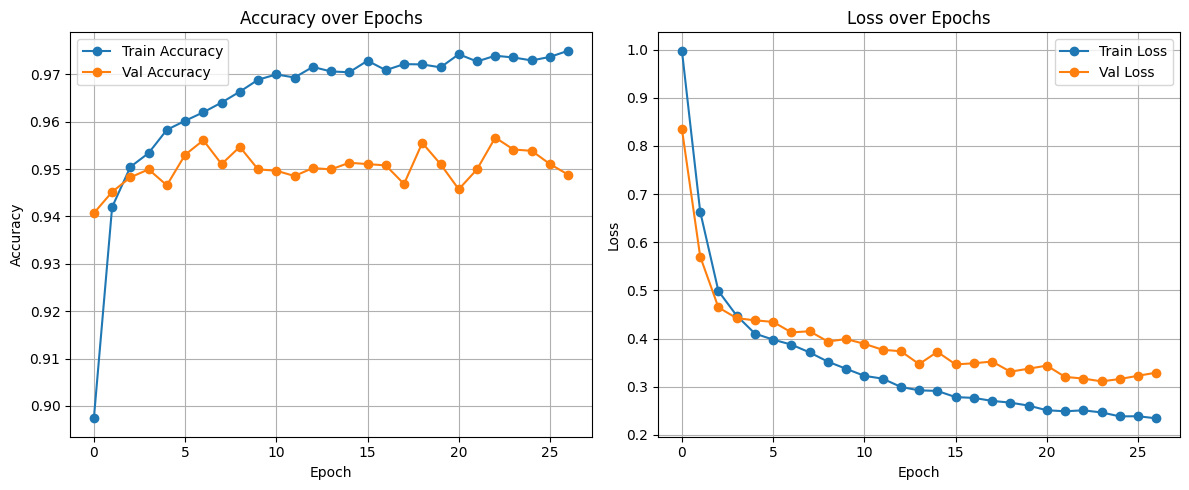

In [17]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
model.save("models/bow_deep_nn_model.keras")  

# Conclusion

1. **Baseline Performance (from previous notebook):**
The baseline model using a simple capital letter count achieved a Test F1-score of 0.68, which is relatively low. T
2. **Bag-of-Words (BoW) and TF-IDF Models:**

    - Logistic Regression with BoW yielded a strong performance (Test F1 = 0.9441), outperforming both Random Forest and XGBoost for this vector type.
    - Similarly, TF-IDF with Logistic Regression also performed well (Test F1 = 0.9322), only slightly worse than BoW.
    - These results highlight that sparse vector representations can be highly effective for  current dataset.

3. **FastText Embeddings:**

    - FastText provided dense, semantically rich vectors, but the models using them did not outperform the BoW or TF-IDF models.

    - Although XGBClassifier had a very high training F1 (0.9923), its Test F1 dropped to 0.8874, indicating overfitting.

4. **BERT**

    - BERT embeddings outperformed all other vector types.
    - It achieves the highest Test F1-score of 0.9662 with XGBClassifier and Logistic Regression (Test F1 = 0.9683)
    - Tuning of XGBoost yielded nearly the same performance (Test F1 = 0.9645)


5. Feedforward Neural Network
    - The FNN using BoW performed similarly to Logistic Regression (Test F1 = 0.94)

# Incorrect Predictions Analysis for the best model (BERT log.regression)

In [4]:
X_test = np.load(os.path.join('samples', 'X_test.npy'), allow_pickle=True)

df_test = pd.DataFrame(X_test, columns=['text'])
df_test['is_fake'] = y_test
df_test.head()

,text,is_fake
0,U.S. diplomats circulate memo critical of immi...,0
1,Rachel Maddow Reveals Her Secret To Successfu...,1
2,Chinese government advisor says more Mandarin ...,0
3,Ex-Trump Campaign Manager Gets PUMMELED On CN...,1
4,Angola's new president takes surprise steps to...,0


In [11]:
best_model = joblib.load("models/BERT_Logistic Regression.joblib")
X_test_bert = np.load('samples/X_test_bert.npy')
X_train_bert = np.load('samples/X_train_bert.npy')

y_pred_best = best_model.predict(X_test_bert)
df_test['predicted'] = y_pred_best

FP = df_test[(df_test['is_fake'] == 0) & (df_test['predicted'] == 1)]
FN = df_test[(df_test['is_fake'] == 1) & (df_test['predicted'] == 0)]
print("False Positives:")
print(FP[['text', 'is_fake', 'predicted']].head(10))
print("False Negatives:")
print(FN[['text', 'is_fake', 'predicted']].head(10))
 

False Positives:
                                                  text  is_fake  predicted
29   Trump: decision on immigrant children coming F...        0          1
82   Exclusive: A third of Americans think Trump's ...        0          1
137  Republican Marco Rubio not making a play for 2...        0          1
254  Carson cancels campaign events after staff in ...        0          1
351  Lebanese army gets two A-29 light-attack aircr...        0          1
397  FBI interviews Hillary Clinton in private serv...        0          1
399  Exclusive: Democratic Party slams GOP candidat...        0          1
486  Trump nominates Callista Gingrich as ambassado...        0          1
637  Factbox: Donald Trump Jr.'s lawyer has experie...        0          1
694     Text: Mitt Romney speech slamming Donald Trump        0          1
False Negatives:
                                                  text  is_fake  predicted
9    OBAMA WARNS: Crackdown On Terrorism In U.S. Wo...        1   

In [ ]:
explainer = shap.Explainer(best_model, X_train_bert)
shap_values = explainer(X_test_bert)

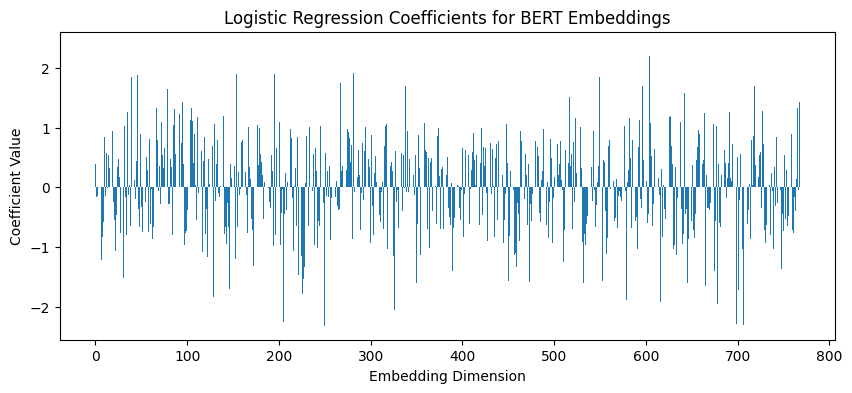

In [31]:
coefs = best_model.coef_[0]
plt.figure(figsize=(10,4))
plt.bar(np.arange(len(coefs)), coefs)
plt.title("Logistic Regression Coefficients for BERT Embeddings")
plt.xlabel("Embedding Dimension")
plt.ylabel("Coefficient Value")
plt.show()

- Our dataset include a lot of names and it may provide confussion for classifier. 
- The model may not actually understand the content and  some of the news sounds similarly
- Also i False Negatives cases we can see a lot of capital letters in the title. So it may be usefull combine our baseline approach (count all-capital words) and vectorization to minimaze FN